# Завдання 1

- Згенерувати 20 випадкових чисел від 0 до 100.
- Написати функцію, що обраховуватиме глибину озера
- Візуалізувати

1. Імпортуємо потрібні бібліотеки для роботи

In [31]:
import random

import matplotlib.pyplot as plt # Імпортуємо модуль для створення графіків
import numpy as np # Імпортуємо модуль для роботи з масивами
from scipy.signal import find_peaks # Імпортуємо функцію для пошуку піків(вершин)

2. Генеруємо 20 випадкових чисел від 0 до 100

Генерую за допомогою random.randint(0, 100) випадкові числа, після чого повторюю це 20 раз for _ in range(20) і записую це все в список. Для подальшої роботи перетворюю список в масив і виводжу його

In [32]:
random_values = np.array([random.randint(0, 100) for _ in range(20)])
print('Random values:', random_values)

Random values: [78 14 71 17 31 57 80 14 69 89 29 37  8 45  8 60 97  4 68 18]


## Build the plot that joins each neighbour's values

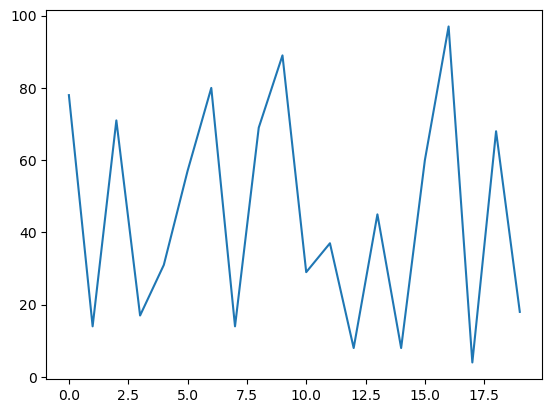

In [33]:
plt.plot(random_values)
plt.show()

## Calculating the depth of the deepest lake

In [34]:
peaks, _ = find_peaks(random_values)

if random_values[0] > random_values[1]:
    peaks = np.insert(peaks, 0, 0)
if random_values[-1] > random_values[-2]:
    peaks = np.append(peaks, len(random_values) - 1)

print('Peaks index:', peaks)
print('Peaks values:', random_values[peaks])

Peaks index: [ 0  2  6  9 11 13 16 18]
Peaks values: [78 71 80 89 37 45 97 68]


In [35]:
max_depth = 0
deepest_lake = None

# Перевіряємо всі пари піків (не лише сусідні)
for i in range(len(peaks)):
    for j in range(i + 1, len(peaks)):  # j > i, щоб уникнути повторень
        start = peaks[i]
        end = peaks[j]
        
        # Перевіряємо, чи між піками немає жодної вищої висоти
        if np.any(random_values[start+1:end] > min(random_values[start], random_values[end])):
            continue
        
        # Мінімум між піками
        valley = min(random_values[start + 1:end])
        # Глибина озера
        depth = min(random_values[start], random_values[end]) - valley
        
        # Перевіряємо, чи це найбільша глибина
        if depth > max_depth:
            max_depth = depth
            deepest_lake = (start, end, valley, depth)

start, end, valley, depth = deepest_lake
print(
    f"---Deepest lake---\n"
    f"Peaks: {random_values[start]}, {random_values[end]}\n"
    f"Valleys: {valley}\n"
    f"Depth: {depth}"
)

---Deepest lake---
Peaks: 89, 97
Valleys: 8
Depth: 81


## Visualization

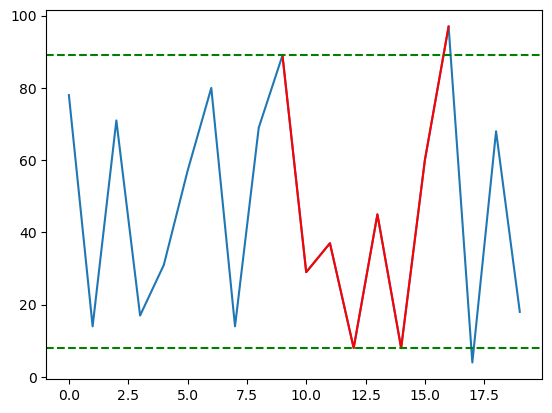

In [36]:
plt.plot(random_values)
plt.plot(range(start, end+1), random_values[start:end+1], color='r')
plt.axhline(y=valley, color='g', linestyle='--')
plt.axhline(y=min(random_values[start], random_values[end]), color='g', linestyle='--')
plt.show()